### Nesse exemplo, usaremos o gradiente descendente em batelada para entendermos o processo de escalonamento dos dados.

In [732]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

In [733]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
seed = 1234
np.random.seed(seed)

### Definição de funções.

In [734]:
def calculateErrorSurface(x1, x2, y, a1_min=-50.0, a1_max=54.0, a2_min=-50.0, a2_max=54.0):
    """Generate data points for plotting the error surface."""
    # Number of points.
    M = 200
    a1 = np.linspace(a1_min, a1_max, M)
    a2 = np.linspace(a2_min, a2_max, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface without feature scaling.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            # Hypothesis function.
            yhat = A1[iter1, iter2]*x1 + A2[iter1, iter2]*x2
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

    return J, A1, A2

def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000):
    """Batch gradient descent solution."""

    # Retrieve number of examples.
    N = len(y)

    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    # Initial error.
    Jgd[0] = (1.0/N)*np.sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > 0.00001:
        # Gradient.
        gradient = -(2.0/N)*X.T.dot(y - X.dot(a))
        # Update.
        a = a - alpha*gradient

        # MSE.
        Jgd[iteration+1] = (1.0/N)*np.sum(np.power((y - X.dot(a)), 2))

        # History.
        grad_hist[:, iteration] = gradient.reshape(2,)
        a_hist[:, iteration+1] = a.reshape(2,)

        # Error.
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])

        # Increment iteration number.
        iteration = iteration + 1

    return a, Jgd, a_hist, grad_hist, iteration

### Gerando o conjunto de dados.

A função objetivo é dada por
$$y = a_1 x_1 + a_2 x_2,$$
onde $a_1$ e $a_2$ são iguais a 1 e $x_1$ e $x_2$ são valores retirados de distribuições Gaussianas com média 0 e variâncias iguais a 1 e 100, respectivamente.

Notem que o atributo $x_1$ tem um intervalo de varição diferente do intervalo de $x_2$.

In [735]:
# Number of pairs feature/label.
N = 10000

# Attribute 1
x1 = 10.0*np.random.randn(N, 1) + 10.0

# Attribute 2
x2 = np.random.randn(N, 1)

# Target function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy version.
y_noisy = y + w

# Concatenate both column vectors to create the attribute matrix.
X = np.c_[x1, x2]

**OBS**.: Percebam que o atributo $x_1$ tem um intervalo de variação maior do que o de $x_2$, pois sua variância é maior, e, além disso, sua média não é 0 e sim, 10. Isso pode ser melhor visualizado através dos histogramas mostrados na figura abaixo.

### Plotando o histograma normalizado dos atributos

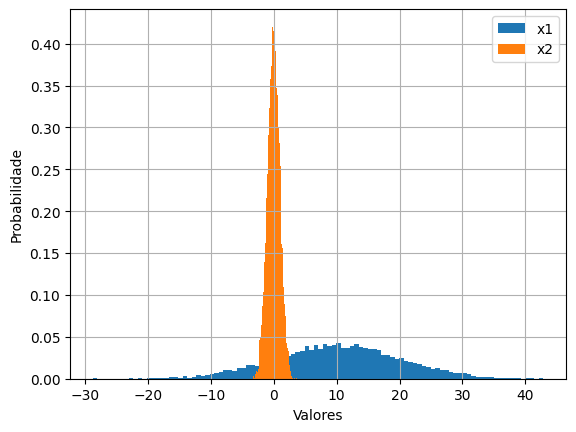

In [736]:
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.legend()
plt.grid()
plt.show()

### Divindo a base de dados total em conjuntos de treinamento e validação.

In [737]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=seed)

### Encontrando a solução ótima sem escalonamento dos atributos.

**OBS**.: Usamos a base de treinamento para encontrar o modelo.

In [738]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X_train).dot(X_train)).dot(np.transpose(X_train).dot(y_train))

print('a1 opt:', a_opt[0,0])
print('a2 opt:', a_opt[1,0])

a1 opt: 1.0001216964648396
a2 opt: 0.9993447069321106


### Calculando os erros de treinamento e teste.

In [739]:
from sklearn.metrics import mean_squared_error

# Train error
y_hat_train = X_train.dot(a_opt)
mse_train = mean_squared_error(y_train, y_hat_train)

print('MSE train:', mse_train)

# Test error
y_hat_test = X_test.dot(a_opt)
mse_test = mean_squared_error(y_test, y_hat_test)

print('MSE test:', mse_test)

MSE train: 1.0032075273820162
MSE test: 0.9632835280375777


### Encontrando a solução com GD em batelada sem escalonamento dos atributos

**OBS**.: O treinamento é feito com o conjunto de treinamento.

In [740]:
# learning rate.
alpha = 0.001 # maximum value before diverging.

# Maximum number of iterations.
n_iterations = 100000

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X_train, y_train, alpha, n_iterations)

print('a1 gd:', a[0,0])
print('a2 gd:', a[1,0])

a1 gd: 1.0000845652240902
a2 gd: 0.9492829599784979


### Calculando os erros de treinamento e teste.

In [741]:
# Train error
y_hat_train = X_train.dot(a)
mse_train = mean_squared_error(y_train, y_hat_train)

print('MSE train:', mse_train)

# Test error
y_hat_test = X_test.dot(a)
mse_test = mean_squared_error(y_test, y_hat_test)

print('MSE test:', mse_test)

MSE train: 1.005702456356893
MSE test: 0.966008248570414


### Plotando erro em função das iterações de treinamento.

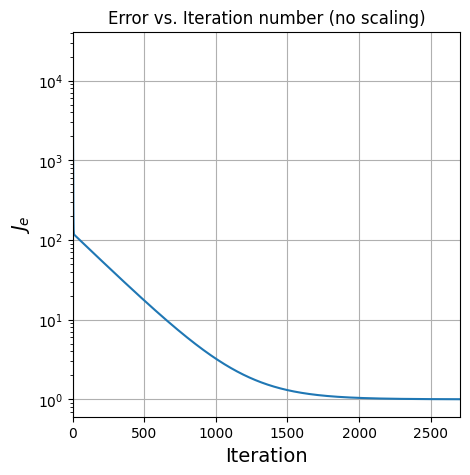

In [742]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number (no scaling)')
plt.grid()
plt.show()

**Observação**.: Percebam na figura acima, que levou mais de 2000 iterações para que o algoritmo convergisse. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Plotando a superfície de erro e de contorno com histórico de atualização dos pesos.

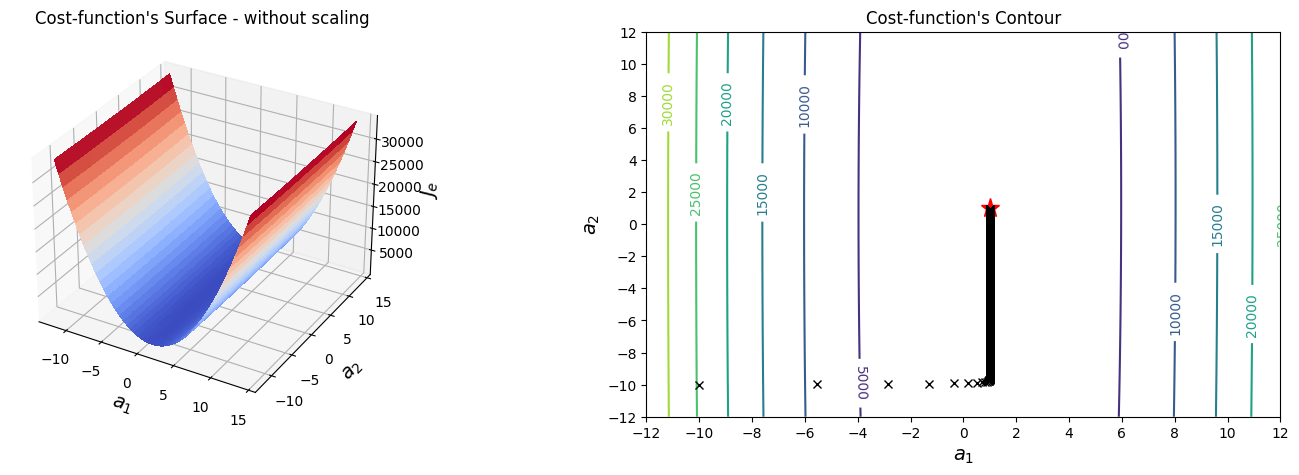

In [743]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(x1, x2, y_noisy, a1_min=-12.0, a1_max=14.0, a2_min=-12.0, a2_max=14.0)

# Plot cost-function surface.
fig = plt.figure(figsize=(18, 5))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface - without scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-12, 14, step=2.0))
ax.set_yticks(np.arange(-12, 14, step=2.0))
plt.xlim([-12,12])
plt.ylim([-12,12])

#Show the plot.
plt.show()

+ Superfície de erro em forma de 'U' com maior taxa de variação do erro na direção de $a_1$.


+ Taxa de variação do erro é praticamente constante na direção de $a_2$ (reta tangente com inclinação de $\approx$0°).


+ Pesos de atributos com variação muito grande são atualizados mais rapidamente do que pesos de atributos com variação pequena.
    + $x_1$ contribui muito mais no valor final do erro, fazendo com que $a_1$ seja rapidamente atualizado.
    
    
+ Como o gradiente na direção de $a_2$ é muito pequeno, o treinamento fica lento.

### Plotando a variação do gradiente ao longo das iterações.

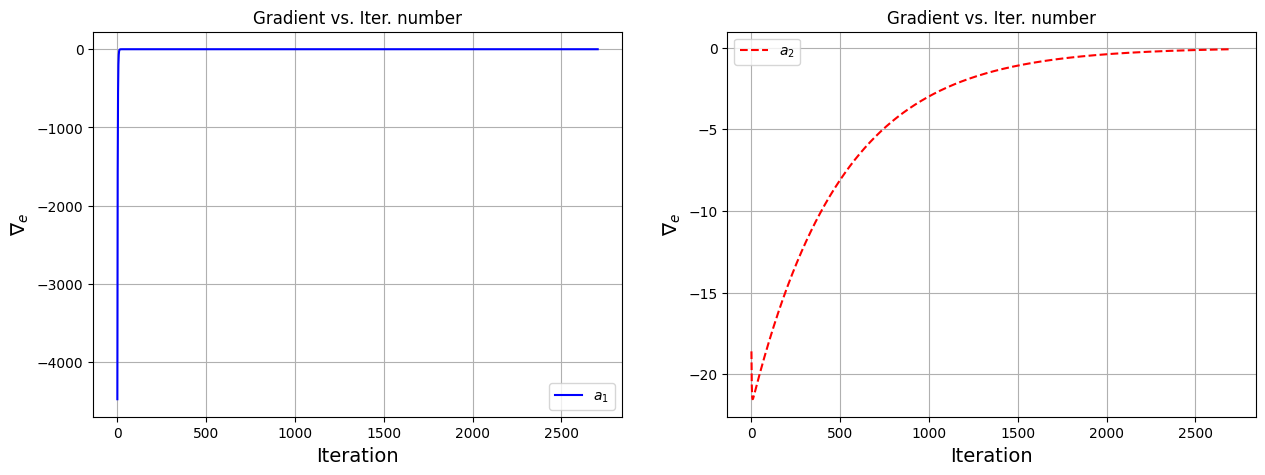

In [744]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration', fontsize=14)
ax1.set_ylabel('$\\nabla_e$', fontsize=14)
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('$\\nabla_e$', fontsize=14)
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

plt.show()

#### Conclusões

+ O algoritmo tem dificuldades em *aprender* devido a região plana da superfície.


+ Converge apenas após mais de 2000 iterações.


+ Variação do gradiente na direção do peso $a_1$ é muito mais rápida do que na direção de $a_2$.


+ Isso se deve ao intervalo de $x_1$ ser maior do que o de $x_2$.

# Padronizando os atributos.

+ A padronização é feita com um objeto da classe `StandardScaler`.
+ O método `fit_transform` da classe `StandardScaler` calcula a média e a variância dos dados de entrada e aplica a padronização a eles.

**OBS**.: Notem que uso métodos diferentes para padronizar os atributos dos dois conjuntos.

In [745]:
# Import Class StandardScaler from module Preprocessing of
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the features.
scaled_X_train = stdScaler.fit_transform(X_train)
scaled_X_test = stdScaler.transform(X_test)

# Splitting the attributes.
scaled_x1 = scaled_X_train[:,0].reshape(len(y_train),1)
scaled_x2 = scaled_X_train[:,1].reshape(len(y_train),1)

### Histograma dos atributos padronizados.

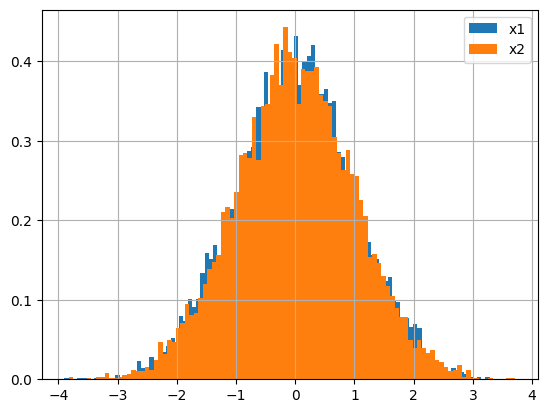

In [746]:
plt.hist(scaled_x1, bins=100, density=True, label='x1')
plt.hist(scaled_x2, bins=100, density=True, label='x2')
plt.legend()
plt.grid()
plt.show()

### Encontrando a solução ótima com padronização dos atributos.

A função hipotese que usaremos tem o seguinte formato:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

**OBS**: O escalonamento modifica o ponto ótimo, ou seja, os valores ótimos dos pesos.

In [747]:
# Closed-form solution.
a_opt_pad = np.linalg.pinv(np.transpose(scaled_X_train).dot(scaled_X_train)).dot(np.transpose(scaled_X_train).dot(y_train))

print('a1 opt:', a_opt_pad[0,0])
print('a2 opt:', a_opt_pad[1,0])

a1 opt: 9.949775287103769
a2 opt: 0.9971464207087686


### Calculando os erros de treinamento e teste.

In [748]:
# Train error
y_hat_train = scaled_X_train.dot(a_opt_pad)
mse_train = mean_squared_error(y_train, y_hat_train)

print('MSE train:', mse_train)

# Test error
y_hat_test = scaled_X_test.dot(a_opt_pad)
mse_test = mean_squared_error(y_test, y_hat_test)

print('MSE test:', mse_test)

MSE train: 105.51648235924739
MSE test: 105.72341982005709


### Encontrando a solução com GD em batelada com padronização dos atributos

In [749]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(scaled_X_train, y_train, alpha, n_iterations)

print('a1 gd:', a[0,0])
print('a2 gd:', a[1,0])

a1 gd: 9.948840714594255
a2 gd: 0.9965239152948943


### Calculando os erros de treinamento e teste.

In [750]:
# Train error
y_hat_train = scaled_X_train.dot(a)
mse_train = mean_squared_error(y_train, y_hat_train)

print('MSE train:', mse_train)

# Test error
y_hat_test = scaled_X_test.dot(a)
mse_test = mean_squared_error(y_test, y_hat_test)

print('MSE test:', mse_test)

MSE train: 105.51648360724646
MSE test: 105.7229361805832


### Plotando erro em função das iterações de treinamento.

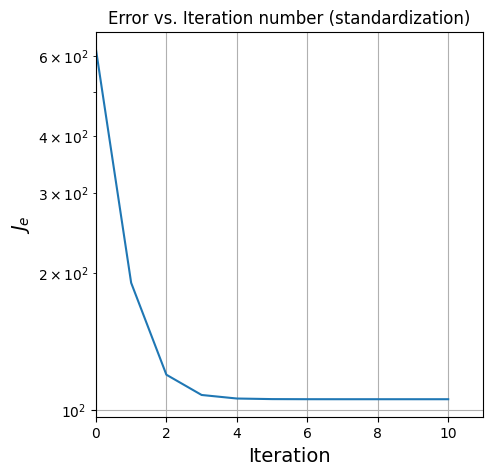

In [751]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number (standardization)')
plt.grid()
plt.show()

**Observação**.: Percebam na figura acima, que o algoritmo convergiu após 4 épocas de treinamento. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Plotando a superfície de erro e de contorno com histórico de atualização dos pesos.

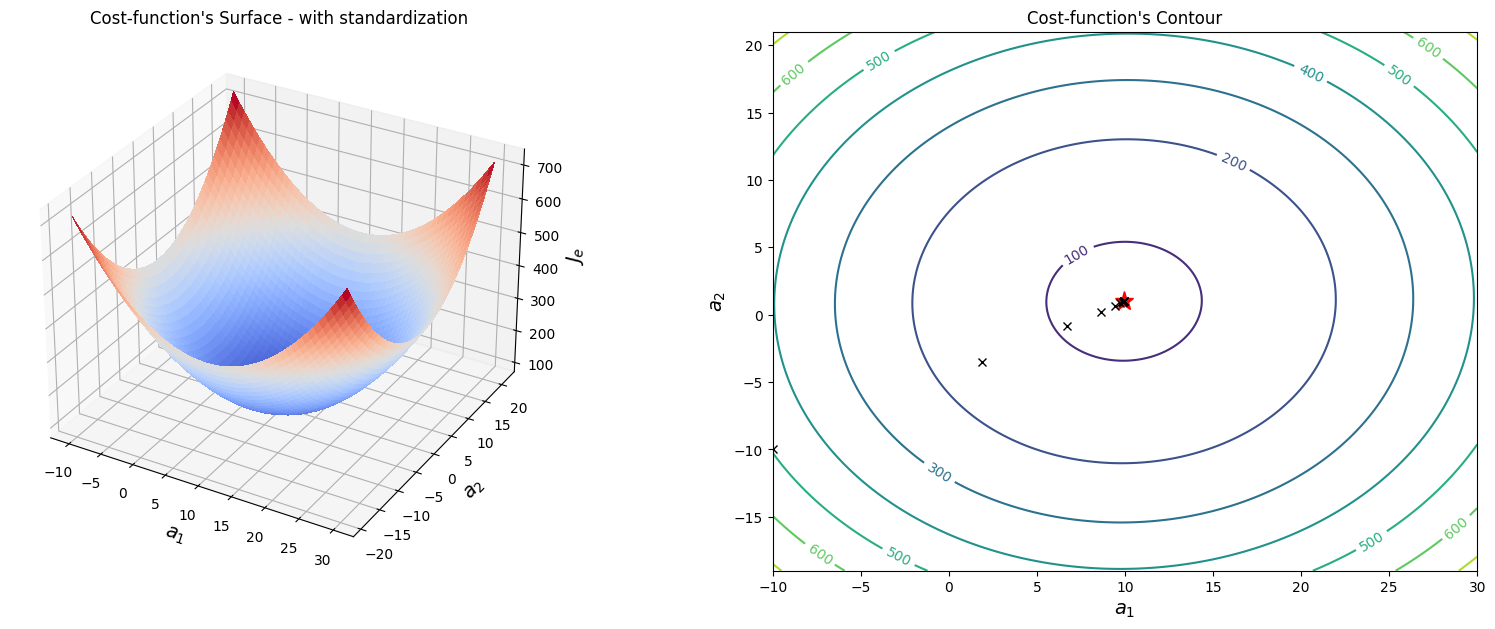

In [752]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(scaled_x1, scaled_x2, y_train, a1_min=-10.0, a1_max=30.0, a2_min=-19.0, a2_max=21.0)

# Plot cost-function surface.
fig = plt.figure(figsize=(20, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface - with standardization')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt_pad[0], a_opt_pad[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

#Show the plot.
plt.show()

#### Observações

+ Quando $x_1$ e $x_2$ têm intervalos de variação semelhantes, então, a variação tanto de $\hat{a}_1$ quanto de $\hat{a}_2$ tem peso semelhante na variação do erro (i.e., no seu cálculo), fazendo com que a superfície tenha um formato de tigela (i.e., circular).
<br/><br/>

+ O gradiente descendente sempre caminha (aponta) na direção de máxima declividade e, aqui, devido à variação do erro ser similar em todas as direções, ele aponta (caminha) diretamente para o ponto de mínimo global.
<br/><br/>

+ Convergência é rápida devido ao formato de tigela (circular) da superfície.
    + Em aproximadamente 4 épocas já temos convergência.

### Plotando a variação do gradiente ao longo das iterações.

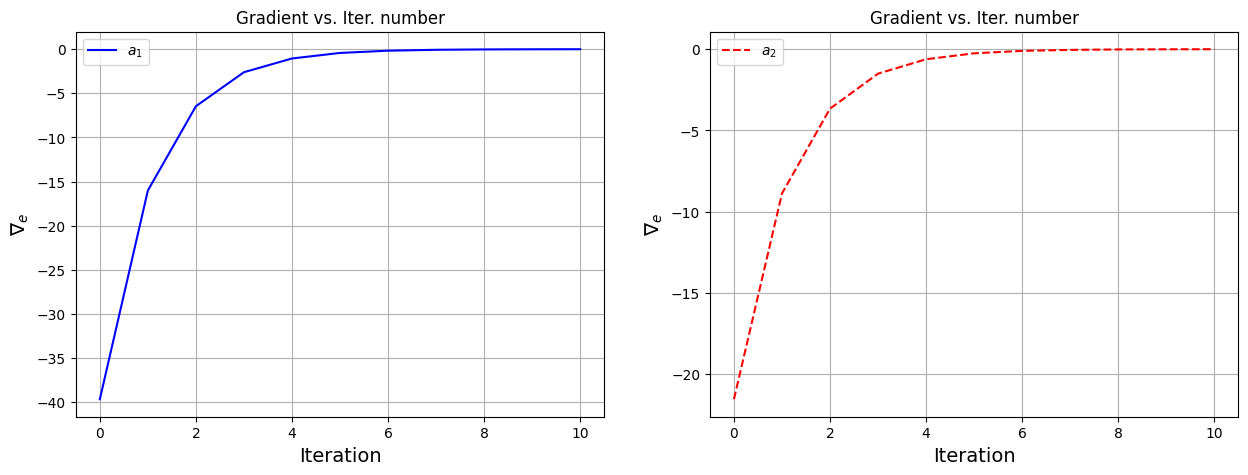

In [753]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration', fontsize=14)
ax1.set_ylabel('$\\nabla_e$', fontsize=14)
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('$\\nabla_e$', fontsize=14)
ax2.set_title('Gradient vs. Iter. number')
ax2.legend()
ax2.grid()

plt.show()

#### Conclusões

+ Com a padronização, a superfície se aproxima do formato de uma “tigela”.


+ As linhas de contorno se tornam mais “circulares”, indicando que a superfície tem inclinação similar em todas as direções dado que os atributos agora têm intervalos similares.


+ O treinamento se torna mais rápido, pois a inclinação da superfície se torna mais íngreme em todas as direções.


+ O algoritmo converge em apenas 5 iterações.

# Normalização dos atributos.

+ A normalização é feita com um objeto da classe `MinMaxScaler`.
+ O método `fit_transform` da classe `MinMaxScaler` calcula os valores mínimo e máximo dos dados de entrada e aplica a normalização a eles.

**OBS**.: Notem que uso métodos diferentes para padronizar os atributos dos dois conjuntos.

In [754]:
# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMax scaler.
minMaxScaler = MinMaxScaler(feature_range=(-0.5, 0.5))

# Standardize the features.
scaled_X_train = minMaxScaler.fit_transform(X_train)
scaled_X_test = minMaxScaler.transform(X_test)

# Splitting the attributes.
scaled_x1 = scaled_X_train[:,0].reshape(len(y_train),1)
scaled_x2 = scaled_X_train[:,1].reshape(len(y_train),1)

### Histograma dos atributos normalizados.

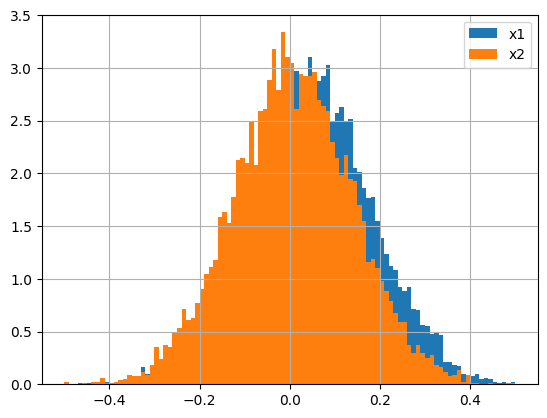

In [755]:
plt.hist(scaled_x1, bins=100, density=True, label='x1')
plt.hist(scaled_x2, bins=100, density=True, label='x2')
plt.legend()
plt.grid()
plt.show()

**Observação**: Percebam que ambos os atributos estão agora restritos ao intervalo de -1/2 à 1/2.

### Encontrando a solução ótima com normalização dos atributos.

Usaremos novamente a seguinte função hipotese:

$$h(\textbf{x}) = \hat{a}_1 x_1 + \hat{a}_2 x_2.$$

**OBS**: O escalonamento modifica o ponto ótimo.

In [756]:
# Closed-form solution.
a_opt_norm = np.linalg.pinv(np.transpose(scaled_X_train).dot(scaled_X_train)).dot(np.transpose(scaled_X_train).dot(y_train))

print('a1 opt:', a_opt_norm[0,0])
print('a2 opt:', a_opt_norm[1,0])

a1 opt: 85.84428031686971
a2 opt: 10.322957918704725


### Calculando os erros de treinamento e teste.

In [757]:
# Train error
y_hat_train = scaled_X_train.dot(a_opt_norm)
mse_train = mean_squared_error(y_train, y_hat_train)

print('MSE train:', mse_train)

# Test error
y_hat_test = scaled_X_test.dot(a_opt_norm)
mse_test = mean_squared_error(y_test, y_hat_test)

print('MSE test:', mse_test)

MSE train: 46.71612606009941
MSE test: 47.62531272615925


### Encontrando a solução com GD em batelada com normalização dos atributos.

In [758]:
# learning rate.
alpha = 14.0 # maximum value before diverging.

# Maximum number of iterations.
n_iterations = 10000

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(scaled_X_train, y_train, alpha, n_iterations)

print('a1 gd:', a[0,0])
print('a2 gd:', a[1,0])

a1 gd: 85.83989730506633
a2 gd: 10.313167416995858


### Calculando os erros de treinamento e teste.


In [759]:
# Train error
y_hat_train = scaled_X_train.dot(a)
mse_train = mean_squared_error(y_train, y_hat_train)

print('MSE train:', mse_train)

# Test error
y_hat_test = scaled_X_test.dot(a)
mse_test = mean_squared_error(y_test, y_hat_test)

print('MSE test:', mse_test)

MSE train: 46.716128169912274
MSE test: 47.625158070678815


### Plotando erro em função das iterações de treinamento.

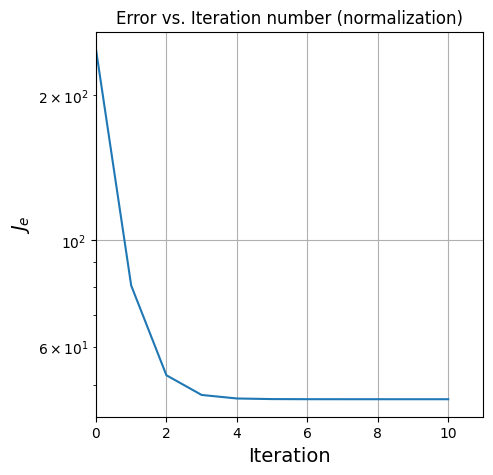

In [760]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number (normalization)')
plt.grid()
plt.show()

**Observação**.: Percebam na figura acima, que o algoritmo convergiu após 4 épocas de treinamento. Isso é devido ao formato do superfície de erro, a qual é plotada logo abaixo.

### Plotando a superfície de erro e de contorno com histórico de atualização dos pesos.

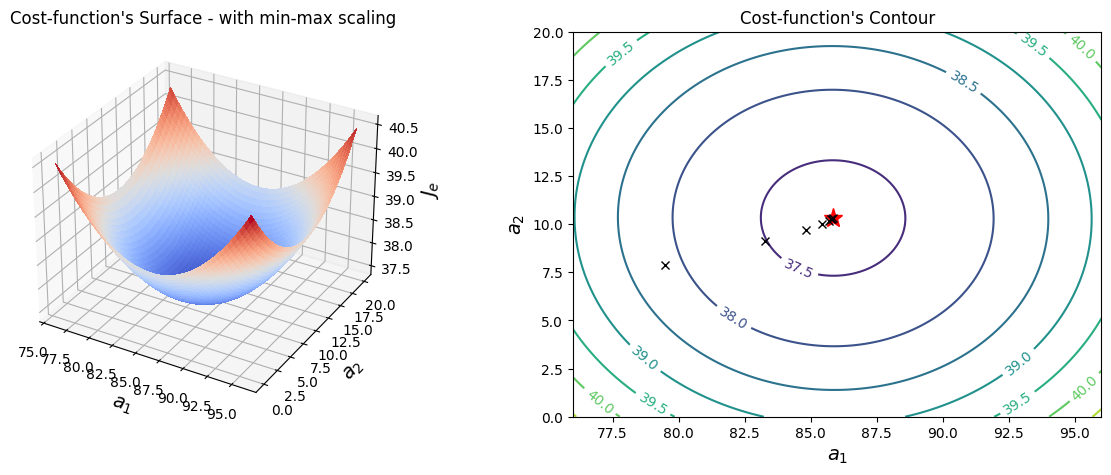

In [761]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(scaled_x1, scaled_x2, y_train, a1_min=76.0, a1_max=96.0, a2_min=0.0, a2_max=20.0)

# Plot cost-function surface.
fig = plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface - with min-max scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt_norm[0], a_opt_norm[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.xlim([76.0, 96.0])
plt.ylim([0.0, 20.0])

#Show the plot.
plt.show()

### Plotando a variação do gradiente ao longo das iterações.

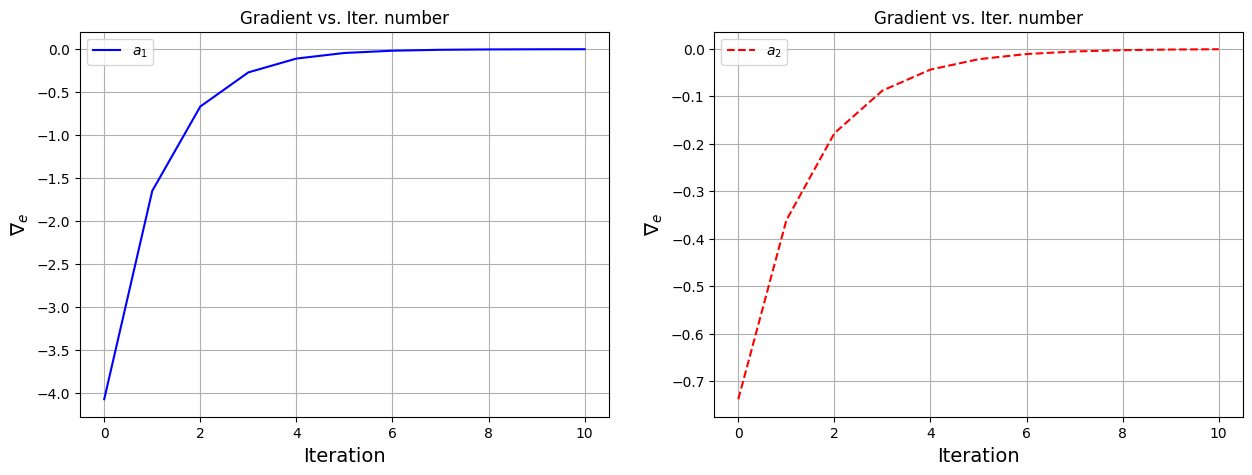

In [762]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration', fontsize=14)
ax1.set_ylabel('$\\nabla_e$', fontsize=14)
ax1.set_title('Gradient vs. Iter. number')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration', fontsize=14)
ax2.set_ylabel('$\\nabla_e$', fontsize=14)
ax2.set_title('Gradient vs. Iter. number')
ax2.grid()
ax2.legend()

plt.show()

**Observações**

+ Percebam que o gradiente varia de forma similar em relação aos dois pesos.
<br/><br/>

+ Isso indica que a superfície de erro é circular, pois sua inclinação é semelhante em ambas as direções, resultando em elementos do vetor gradiente com valores similares.
<br/><br/>

+ A superfície tem inclinação semelhante em ambas as direções.
<br/><br/>

+ Como os valores dos vetores gradiente variam rapidamente em relação a ambos os pesos (ou seja, tendem a zero), a convergência se torna rápida, consecutivamente.

## Para casa

Como vimos, o escalonamento altera os valores dos pesos ótimos. Portanto, demonstre matematicamente a relação dos novos pesos com os antigos. Apresente a demonstração para a padronização.